In [1]:
pip install psycopg2-binary python-dotenv requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import requests
import pandas as pd
from sqlalchemy import create_engine
from utils import get_conn_string, load_countries_to_table, create_country_view

income_id = {'HIC': 4, 'LIC': 1, 'LMC': 2, 'UMC': 3, 'INX': 0}

<AxesSubplot:xlabel='region'>

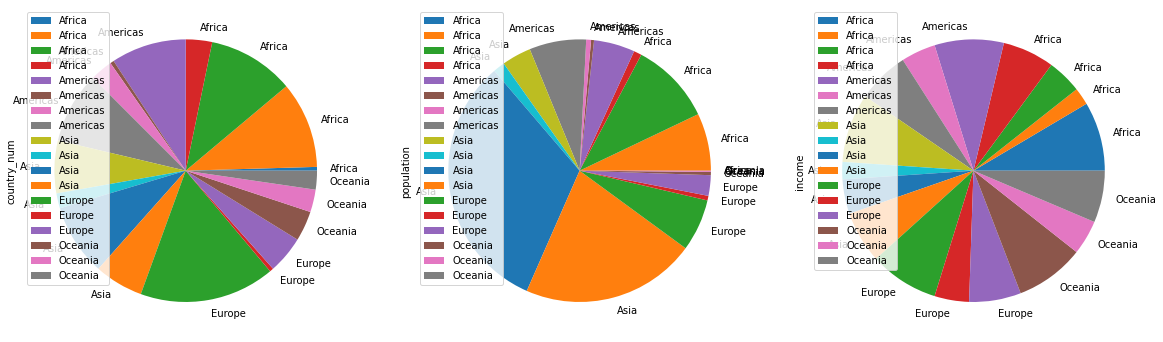

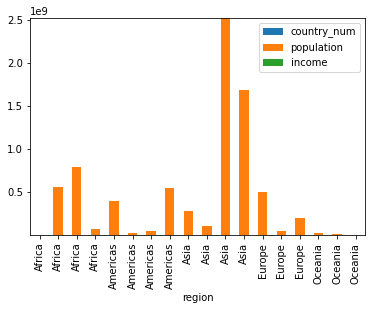

In [3]:
# fetch data from DB using sql and visualize the data
conn_string = get_conn_string()
sql = '''select
        region, "incomeLevel.id", count(id)
        country_num, sum(population)
        population
        from country_info group
        by
        region, "incomeLevel.id";'''
db_conn = create_engine(conn_string).connect()
df = pd.read_sql(sql, db_conn)
df['income'] = df['incomeLevel.id'].map(income_id)
df = df.drop(['incomeLevel.id'], axis = 1).set_index('region')
df.plot.pie(subplots=True, figsize=(20, 8))
df.plot.bar(stacked=True)

<AxesSubplot:xlabel='region'>

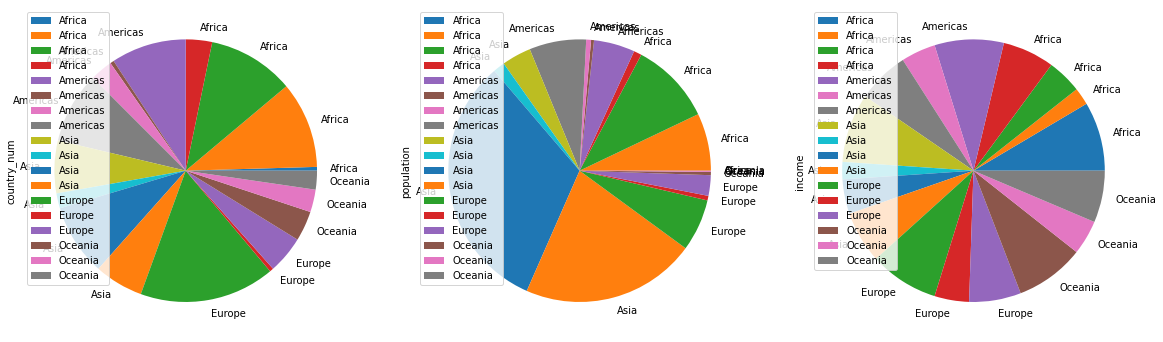

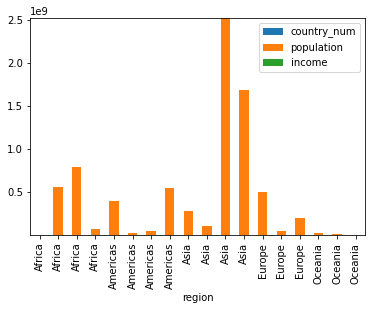

In [4]:
# fetch data using API and visualize the data
base_url = 'http://192.168.1.65:5000'
response = requests.get(base_url + '/report/income')
df = pd.read_json(json.loads(response.text)['results'])
df['income'] = df['incomeLevel.id'].map(income_id)
df = df.drop(['incomeLevel.id'], axis = 1).set_index('region')
df.plot.pie(subplots=True, figsize=(20, 8))
df.plot.bar(stacked=True)